In [15]:
%reload_ext nb_black

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import warnings

from scipy.stats import boxcox

from scipy.stats import jarque_bera
from scipy.stats import normaltest

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "studentsperformance"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

education_df = pd.read_sql_query("select * from studentsperformance", con=engine)
engine.dispose()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
education_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

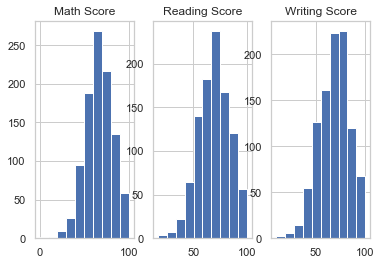

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# According to the histograms the data does not look like it is normally distributed
plt.subplot(1, 3, 1)
plt.hist(education_df["math score"])
plt.title("Math Score")

plt.subplot(1, 3, 2)
plt.hist(education_df["reading score"])
plt.title("Reading Score")

plt.subplot(1, 3, 3)
plt.hist(education_df["writing score"])
plt.title("Writing Score")

plt.show()

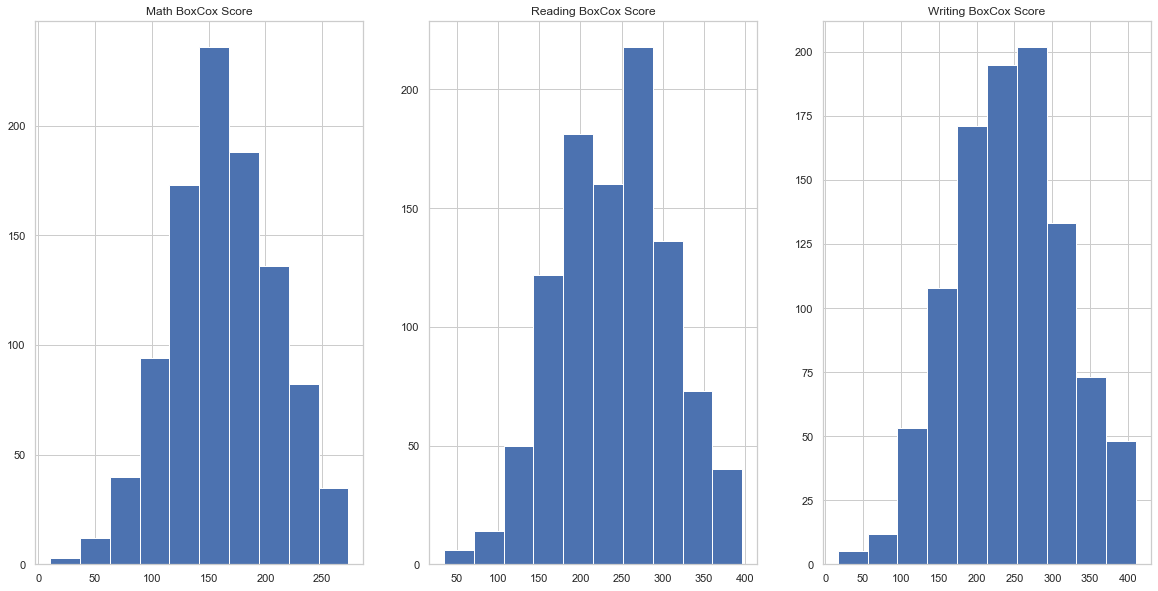

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
math_boxcox, _ = boxcox(education_df[education_df["math score"] > 0]["math score"])
reading_boxcox, _ = boxcox(
    education_df[education_df["reading score"] > 0]["reading score"]
)
writing_boxcox, _ = boxcox(
    education_df[education_df["writing score"] > 0]["writing score"]
)
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("Math BoxCox Score")

plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("Reading BoxCox Score")

plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("Writing BoxCox Score")

plt.show()

In [20]:
jb_math_stats = jarque_bera(education_df["math score"])
norm_math_stats = normaltest(education_df["math score"])
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_math_stats[0], jb_math_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_math_stats[0], norm_math_stats[1]
    )
)
jb_reading_stats = jarque_bera(education_df["reading score"])
norm_reading_stats = normaltest(education_df["reading score"])
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_reading_stats[0], jb_reading_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_reading_stats[0], norm_reading_stats[1]
    )
)
jb_writing_stats = jarque_bera(education_df["writing score"])
norm_writing_stats = normaltest(education_df["writing score"])
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_writing_stats[0], jb_writing_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_writing_stats[0], norm_writing_stats[1]
    )
)

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
jb_mathb_stats = jarque_bera(math_boxcox)
norm_mathb_stats = normaltest(math_boxcox)
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_mathb_stats[0], jb_mathb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_mathb_stats[0], norm_mathb_stats[1]
    )
)
jb_readingb_stats = jarque_bera(reading_boxcox)
norm_readingb_stats = normaltest(reading_boxcox)
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_readingb_stats[0], jb_readingb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_readingb_stats[0], norm_readingb_stats[1]
    )
)
jb_writingb_stats = jarque_bera(writing_boxcox)
norm_writingb_stats = normaltest(writing_boxcox)
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        jb_writingb_stats[0], jb_writingb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        norm_writingb_stats[0], norm_writingb_stats[1]
    )
)

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

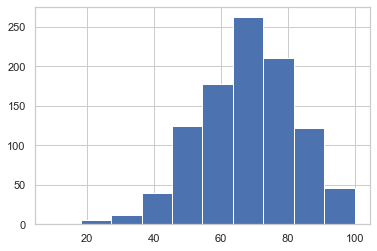

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
exam = (
    education_df["math score"]
    + education_df["reading score"]
    + education_df["writing score"]
) / 3

plt.hist(exam)
plt.show()

exam_jb_stats = jarque_bera(exam)
exam_norm_stats = normaltest(exam)
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        exam_jb_stats[0], exam_jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        exam_norm_stats[0], exam_norm_stats[1]
    )
)

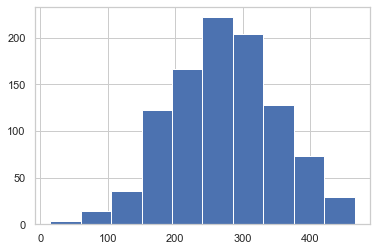

Jarque-Bera test statistics is 2.4353989331279173 and p value is 0.29591013563984203
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
exam_boxcox, _ = boxcox(exam)

plt.hist(exam_boxcox)
plt.show()

examb_jb_stats = jarque_bera(exam_boxcox)
examb_norm_stats = normaltest(exam_boxcox)
print(
    "Jarque-Bera test statistics is {0} and p value is {1}".format(
        examb_jb_stats[0], examb_jb_stats[1]
    )
)
print(
    "Normality test statistics is {0} and p value is {1}".format(
        examb_norm_stats[0], examb_norm_stats[1]
    )
)

Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

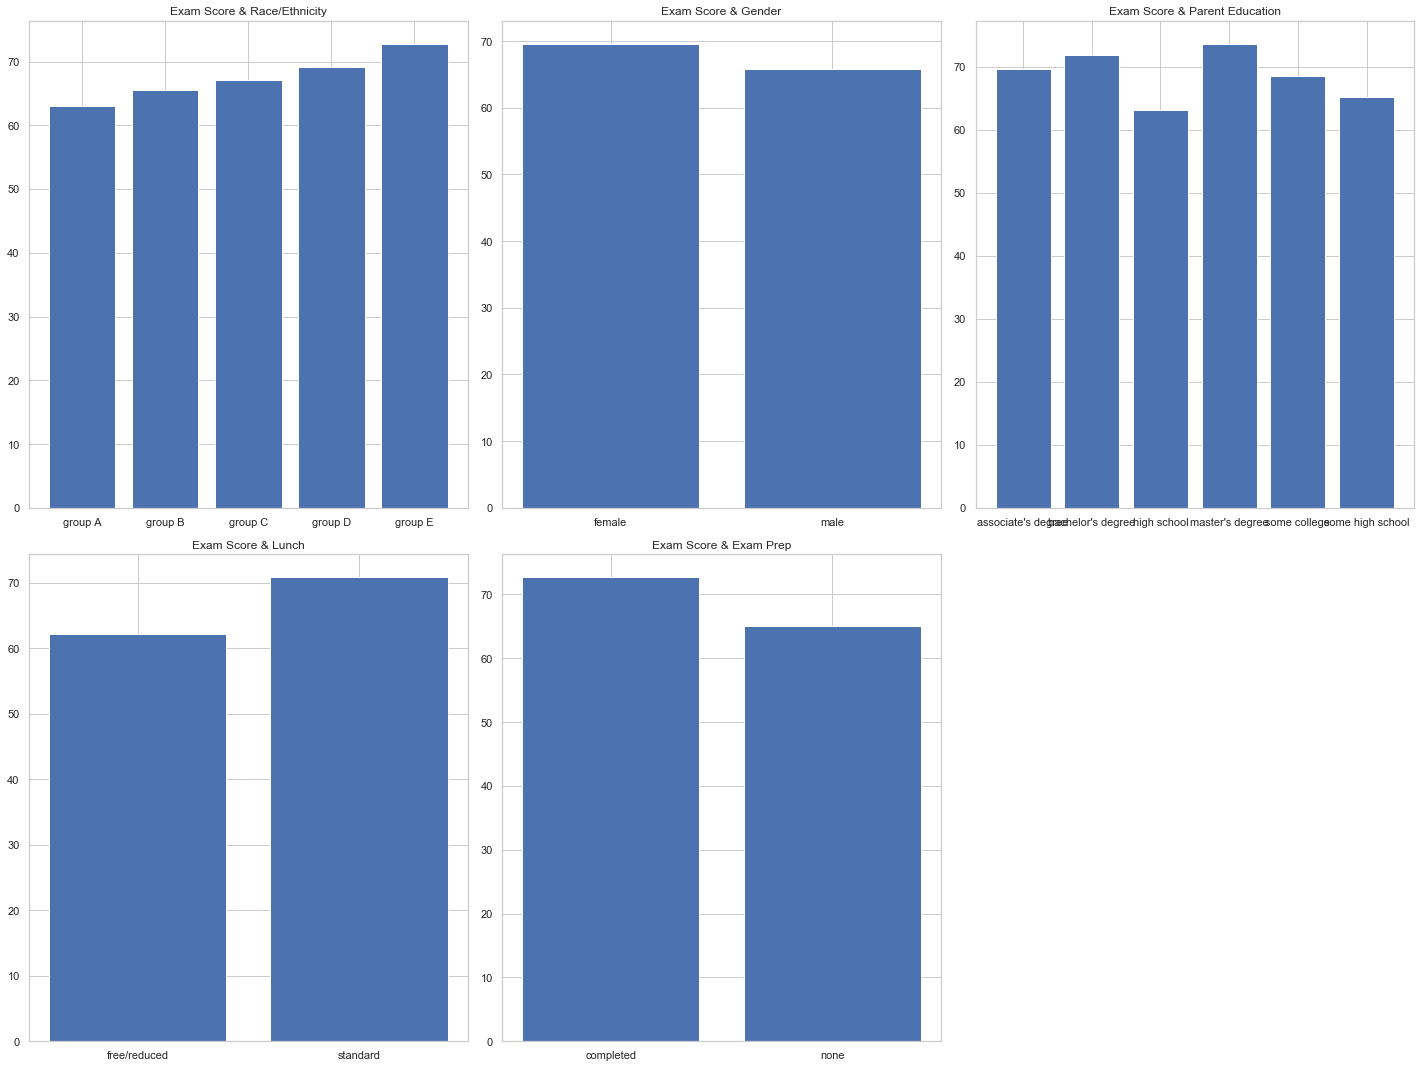

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
education_df["tot_exam_score"] = exam
plt.figure(figsize=(20, 15))
plt.subplot(2, 3, 1)
plt.bar(
    education_df.groupby("race/ethnicity")["tot_exam_score"].mean().index,
    education_df.groupby("race/ethnicity")["tot_exam_score"].mean(),
)
plt.title("Exam Score & Race/Ethnicity")

plt.subplot(2, 3, 2)
plt.bar(
    education_df.groupby("gender")["tot_exam_score"].mean().index,
    education_df.groupby("gender")["tot_exam_score"].mean(),
)
plt.title("Exam Score & Gender")

plt.subplot(2, 3, 3)
plt.bar(
    education_df.groupby("parental level of education")["tot_exam_score"].mean().index,
    education_df.groupby("parental level of education")["tot_exam_score"].mean(),
)
plt.title("Exam Score & Parent Education")

plt.subplot(2, 3, 4)
plt.bar(
    education_df.groupby("lunch")["tot_exam_score"].mean().index,
    education_df.groupby("lunch")["tot_exam_score"].mean(),
)
plt.title("Exam Score & Lunch")

plt.subplot(2, 3, 5)
plt.bar(
    education_df.groupby("test preparation course")["tot_exam_score"].mean().index,
    education_df.groupby("test preparation course")["tot_exam_score"].mean(),
)
plt.title("Exam Score & Exam Prep")

plt.tight_layout()
plt.show()